In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import numpy as np

np.random.seed(2017) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"



In [2]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [3]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)



('Mean Vector:\n', array([[ 0.52420768],
       [ 0.49723218],
       [ 0.44262541]]))


## calculate scatter matrix

In [4]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:, i].reshape(3, 1) - mean_vector).dot((all_samples[:, i].reshape(3, 1) - mean_vector).T)
scatter_matrix

array([[ 45.50484189,  29.91682578,  16.04093323],
       [ 29.91682578,  55.94126598,  21.89998791],
       [ 16.04093323,  21.89998791,  51.71982065]])

In [5]:
from seaborn import heatmap

In [6]:
heatmap(scatter_matrix)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


## compute covariance matrix

In [7]:
cov_mat = np.cov(all_samples)

In [8]:
cov_mat

array([[ 1.16679082,  0.7670981 ,  0.41130598],
       [ 0.7670981 ,  1.43439144,  0.56153815],
       [ 0.41130598,  0.56153815,  1.32614925]])

In [9]:
heatmap(cov_mat)

## compute eigenvectors and corresponding eigenvalues

In [10]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [11]:
eig_val

array([ 2.49301783,  0.5175822 ,  0.91673147])

In [12]:
eig_vec

array([[-0.54354283, -0.7350109 , -0.40536424],
       [-0.66532269,  0.67170265, -0.32582399],
       [-0.51176842, -0.09259873,  0.85411859]])

In [13]:
eig_pairs = [(eig_val[i], eig_vec[:, i]) for i in range(eig_vec.shape[0])]

In [14]:
eig_pairs.sort(key = lambda x: -x[0])

In [15]:
eig_pairs

[(2.493017829758756, array([-0.54354283, -0.66532269, -0.51176842])),
 (0.91673146577129982, array([-0.40536424, -0.32582399,  0.85411859])),
 (0.51758220483211814, array([-0.7350109 ,  0.67170265, -0.09259873]))]

## choose k eigenvectors with largest eigenvalues

In [16]:
matrix_w = np.hstack([eig_pairs[i][1].reshape(3,1) for i in range(2)])

In [17]:
matrix_w

array([[-0.54354283, -0.40536424],
       [-0.66532269, -0.32582399],
       [-0.51176842,  0.85411859]])

## transform samples onto new subspace

### y = W^T * x

In [18]:
transformed = matrix_w.T.dot(all_samples)

In [19]:
transformed.shape

(2, 40)

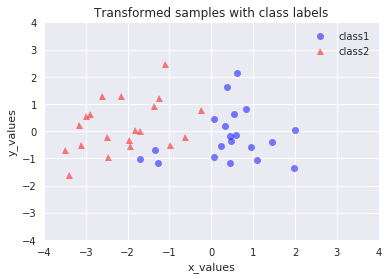

In [22]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## results using scikit-learn PCA, plot is same as above

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
skres = pca.fit_transform(all_samples.T).T

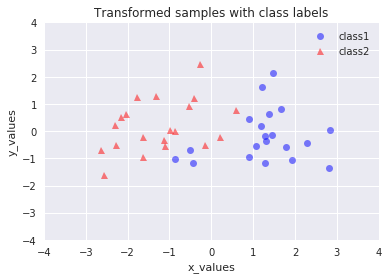

In [26]:
plt.plot(skres[0,0:20], skres[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(skres[0,20:40], skres[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()